# Download file

In [7]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2018-12-07 16:46:17--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: `mini_classes.txt'

100%[======================================>] 760         --.-K/s   in 0s      

2018-12-07 16:46:17 (171 MB/s) - `mini_classes.txt' saved [760/760]



In [8]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [9]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [12]:
from six.moves import urllib
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data_all/'+c+'.npy')

In [13]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

# LSTM

In [30]:
import os
import glob
import numpy as np
import keras
from keras import *
import tensorflow as tf

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [34]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./data_all/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

    
        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)


    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [35]:
Xtrain, Ytrain, Xtest, Ytest, class_names = load_data()
num_classes = len(class_names)
image_size = 28

broom


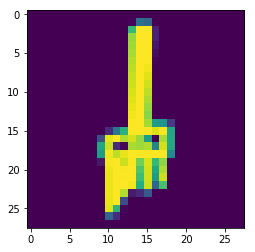

In [36]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(Xtrain))
plt.imshow(Xtrain[idx].reshape(28,28)) 
print(class_names[int(Ytrain[idx].item())])

In [37]:
# Reshape and normalize
x_train = Xtrain.reshape(Xtrain.shape[0], image_size, image_size).astype('float32')
x_test = Xtest.reshape(Xtest.shape[0], image_size, image_size).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(Ytrain, num_classes)
y_test = keras.utils.to_categorical(Ytest, num_classes)

In [38]:
x_train = np.array(Xtrain).reshape((-1, 28, 28))
x_test = np.array(Xtest).reshape((-1, 28, 28))

In [39]:
model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(100,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
Total params: 317,540
Trainable params: 317,540
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
model.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 400000 samples, validate on 100000 samples
Epoch 1/50
54s - loss: 2.5485 - acc: 0.3677 - val_loss: 2.0887 - val_acc: 0.4637
Epoch 2/50
53s - loss: 1.9340 - acc: 0.5022 - val_loss: 1.8516 - val_acc: 0.5214
Epoch 3/50
52s - loss: 1.7642 - acc: 0.5424 - val_loss: 1.7413 - val_acc: 0.5498
Epoch 4/50
53s - loss: 1.6574 - acc: 0.5682 - val_loss: 1.6584 - val_acc: 0.5698
Epoch 5/50
53s - loss: 1.5823 - acc: 0.5864 - val_loss: 1.6045 - val_acc: 0.5838
Epoch 6/50
53s - loss: 1.5243 - acc: 0.6007 - val_loss: 1.5626 - val_acc: 0.5941
Epoch 7/50
53s - loss: 1.4776 - acc: 0.6116 - val_loss: 1.5271 - val_acc: 0.6017
Epoch 8/50
53s - loss: 1.4461 - acc: 0.6187 - val_loss: 1.5166 - val_acc: 0.6055
Epoch 9/50
53s - loss: 1.4128 - acc: 0.6266 - val_loss: 1.4924 - val_acc: 0.6118
Epoch 10/50
53s - loss: 1.3890 - acc: 0.6328 - val_loss: 1.4735 - val_acc: 0.6173
Epoch 11/50
53s - loss: 1.3653 - acc: 0.6393 - val_loss: 1.4751 - val_acc: 0.6167
Epoch 12/50
53s - loss: 1.3445 - acc: 0.6429 - val_loss

KeyboardInterrupt: 

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 63.21%
